# Predicting Mental Health Risks: Insights from Academic, Work, and Lifestyle Factors

**Problem Statement:**

Mental health challenges such as depression and suicidal thoughts are growing concerns among students and working professionals. Various factors — including academic/work pressure, study satisfaction, sleep duration, dietary habits, financial stress, and family history of mental illness — may significantly influence mental health outcomes.

However, the complex interplay of these factors is often poorly understood, making it difficult to design effective preventive interventions or provide targeted support for at-risk groups.

This project seeks to:

- Identify key demographic, academic, work, and lifestyle patterns associated with depression and suicidal thoughts.

- Examine correlations (e.g., how academic pressure and study satisfaction impact students’ mental health).

- Build predictive models to assess the likelihood of depression or suicidal thoughts based on measurable factors such as work/study hours, CGPA, sleep, and financial stress.

- Provide actionable insights that can inform universities, employers, and policymakers in designing better mental health support systems.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# import data
data = pd.read_csv('https://raw.githubusercontent.com/AtandaPrecious/Student-Health/main/student_depression_dataset.csv')


### Data Understanding and Cleaning

In [3]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

| Column Name                               | Description                                                                       |
| ----------------------------------------- | --------------------------------------------------------------------------------- |
| **id**                                    | Unique identifier for each respondent.                                            |
| **Gender**                                | Gender of the respondent (e.g., Male, Female, Other).                             |
| **Age**                                   | Age of the respondent in years.                                                   |
| **City**                                  | City of residence of the respondent.                                              |
| **Profession**                            | Occupation (e.g., Student, Working Professional, etc.).                           |
| **Academic Pressure**                     | Self-reported level of academic pressure (numeric scale, e.g., 0–5).              |
| **Work Pressure**                         | Self-reported level of work-related pressure (numeric scale, e.g., 0–5).          |
| **CGPA**                                  | Cumulative Grade Point Average of students.                                       |
| **Study Satisfaction**                    | Satisfaction with study experience (numeric scale, e.g., 0–5).                    |
| **Job Satisfaction**                      | Satisfaction with current job (numeric scale, e.g., 0–5).                         |
| **Sleep Duration**                        | Average sleep duration (categorical: e.g., *Less than 5 hours, 5–6 hours*).       |
| **Dietary Habits**                        | Eating habits (e.g., Healthy, Moderate, Unhealthy).                               |
| **Degree**                                | Educational qualification of the respondent (e.g., B.Sc, B.Tech, M.Tech).         |
| **Have you ever had suicidal thoughts ?** | Self-reported history of suicidal thoughts (Yes/No).                              |
| **Work/Study Hours**                      | Average daily work or study hours.                                                |
| **Financial Stress**                      | Presence of financial stress (Yes/No/Scale).                                      |
| **Family History of Mental Illness**      | Whether respondent has a family history of mental illness (Yes/No).               |
| **Depression**                            | Whether respondent reports depression (binary: 0 = No, 1 = Yes).                  |


The Financial Stress column should be an integer not object
All columns in float type should be int except CGPA

In [5]:
# Identify all float columns
float_cols = data.select_dtypes(include='float64').columns

# Exclude 'CGPA' from conversion
cols_to_convert = [col for col in float_cols if col != 'CGPA']

# Convert selected columns to integer
data[cols_to_convert] = data[cols_to_convert].astype(int)


In [6]:
data['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [7]:
data[data['Financial Stress'] == '?']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32,Varanasi,Student,3,0,5.64,1,0,'5-6 hours',Healthy,BCA,No,12,?,No,1
13596,68910,Male,29,Hyderabad,Student,2,0,8.94,3,0,'Less than 5 hours',Unhealthy,B.Ed,No,12,?,Yes,0
19266,97610,Female,20,Kolkata,Student,1,0,6.83,1,0,'5-6 hours',Healthy,MBBS,No,9,?,Yes,0


The rows with financial stress as ? will be dropped

In [8]:
data = data[data['Financial Stress'] != '?']

In [9]:
# Convert Financial Stress to integer
# Convert string floats to actual integers
data['Financial Stress'] = data['Financial Stress'].astype(float).astype(int)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27898.0,70442.953402,40642.015063,2.0,35040.75,70689.00,105824.75,140699.0
Age,27898.0,25.822174,4.905651,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27898.0,3.141336,1.381462,0.0,2.00,3.00,4.00,5.0
Work Pressure,27898.0,0.000430,0.043994,0.0,0.00,0.00,0.00,5.0
CGPA,27898.0,7.656160,1.470708,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27898.0,2.943974,1.361122,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27898.0,0.000681,0.044397,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27898.0,7.156570,3.707598,0.0,4.00,8.00,10.00,12.0
Financial Stress,27898.0,3.139867,1.437347,1.0,2.00,3.00,4.00,5.0
Depression,27898.0,0.585526,0.492640,0.0,0.00,1.00,1.00,1.0


Statistics Summary table looks reasonable except for the CGPA, realistically, its not possible to have a CGPA of Zero.

We will explore the rows were CGPA = 0 for better understanding

In [11]:
data[data['CGPA'] == 0]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4365,21880,Male,38,Chennai,Student,0,5,0.0,0,4,'5-6 hours',Healthy,'Class 12',No,2,3,No,0
10407,52737,Male,28,Vadodara,Student,3,0,0.0,4,0,'Less than 5 hours',Healthy,BBA,No,12,2,No,0
11489,58062,Female,32,Vadodara,Student,5,0,0.0,0,0,'Less than 5 hours',Unhealthy,'Class 12',Yes,11,5,No,1
13909,70453,Female,20,Ahmedabad,Student,0,0,0.0,0,2,'Less than 5 hours',Moderate,'Class 12',Yes,12,3,Yes,1
14855,75007,Male,21,Lucknow,Student,0,2,0.0,0,1,'7-8 hours',Moderate,'Class 12',Yes,3,3,Yes,0
20913,105773,Male,18,Ahmedabad,Student,0,0,0.0,0,1,'Less than 5 hours',Moderate,'Class 12',Yes,9,5,No,1
21805,110097,Male,34,Pune,Student,1,0,0.0,5,0,'Less than 5 hours',Unhealthy,M.Ed,Yes,10,3,Yes,0
25746,129756,Male,18,Rajkot,Student,0,5,0.0,0,4,'7-8 hours',Moderate,'Class 12',Yes,9,4,No,1
26719,134830,Female,24,Meerut,Student,0,0,0.0,0,2,'More than 8 hours',Unhealthy,'Class 12',No,0,5,No,0


A CGPA of 0 is not a valid academic score in the grading system and likely results from data entry errors or incomplete records. Retaining such unrealistic values could introduce noise and bias into the analysis, especially during predictive modeling, where the model might falsely associate “0” with extreme mental health outcomes. Since the affected rows are minimal (9), removing them ensures data integrity and reliability without significantly affecting sample size.

In [12]:
# dropping cgpa = 0
data = data[data['CGPA'] != 0]

In [13]:
data.id.duplicated().sum()

0

#### Exploring Non Numerical Columns

In [14]:
data.Profession.unique()

array(['Student', "'Civil Engineer'", 'Architect', "'UX/UI Designer'",
       "'Digital Marketer'", "'Content Writer'",
       "'Educational Consultant'", 'Teacher', 'Manager', 'Chef', 'Doctor',
       'Lawyer', 'Entrepreneur', 'Pharmacist'], dtype=object)

some of the information in this columns were entered with quotes, this will be removed for better looking data

In [15]:
# Remove all quotes using regex
data['Profession'] = data['Profession'].str.replace(r"[\"']", "", regex=True)


In [16]:
data['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [17]:
# Remove all quotes using regex
data['Sleep Duration'] = data['Sleep Duration'].str.replace(r"[\"']", "", regex=True)

In [18]:
data['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

Asides from information entered with quotes, there is another data entry with this column.
There is no city called 3.0, ME, M.com, Less Delhi and Less than 5 kaylan -- we will go through it for better understanding

In [19]:
# Remove all quotes using regex
data['City'] = data['City'].str.replace(r"[\"']", "", regex=True)

In [20]:
data[data['City'] == '3.0']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
7021,35309,Female,21,3.0,Student,3,0,8.69,4,0,7-8 hours,Unhealthy,BCA,Yes,11,5,No,1


In [21]:
# Drop rows where 'City' is '3.0'
data = data[data['City'] != '3.0']

In [22]:
data[data['City'] == 'ME']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18377,93066,Female,25,ME,Student,2,0,6.0,2,0,7-8 hours,Healthy,BHM,Yes,8,1,No,0


In [23]:
data[data['City'] == 'M.Com']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
22682,114378,Female,26,M.Com,Student,4,0,8.95,1,0,Less than 5 hours,Unhealthy,MBA,Yes,2,5,No,1


In [24]:
data[data['City'] == 'M.Tech']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
5697,28672,Male,29,M.Tech,Student,3,0,7.04,5,0,7-8 hours,Moderate,M.Tech,No,11,1,No,0


In [25]:
data[data['City'] == 'City']

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
6830,34300,Female,28,City,Student,3,0,7.49,3,0,7-8 hours,Unhealthy,'Class 12',No,6,2,No,1
24008,120908,Female,29,City,Student,3,0,8.58,1,0,Less than 5 hours,Healthy,LLM,No,6,2,Yes,0


In [26]:
# Drop rows where City is 'ME' or 'M.Com'
data = data[~data['City'].isin(['ME', 'M.Com', 'M.Tech', 'City'])]

- The row where city is 3.0 was dropped, as it is an error

- The rows where city is ME, M.Tech, City and M.com are errors too and were dropped

In [27]:
# Replace incorrect city names with correct ones
data['City'] = data['City'].replace({
    'Less Delhi': 'Delhi',
    'Less than 5 Kalyan': 'Kalyan'
})

In [28]:
data['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [29]:
# Remove all quotes using regex
data['Degree'] = data['Degree'].str.replace(r"[\"']", "", regex=True)

In [30]:
data['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [31]:
data.shape

(27883, 18)

## Exploratory Data Analysis

### Distribution

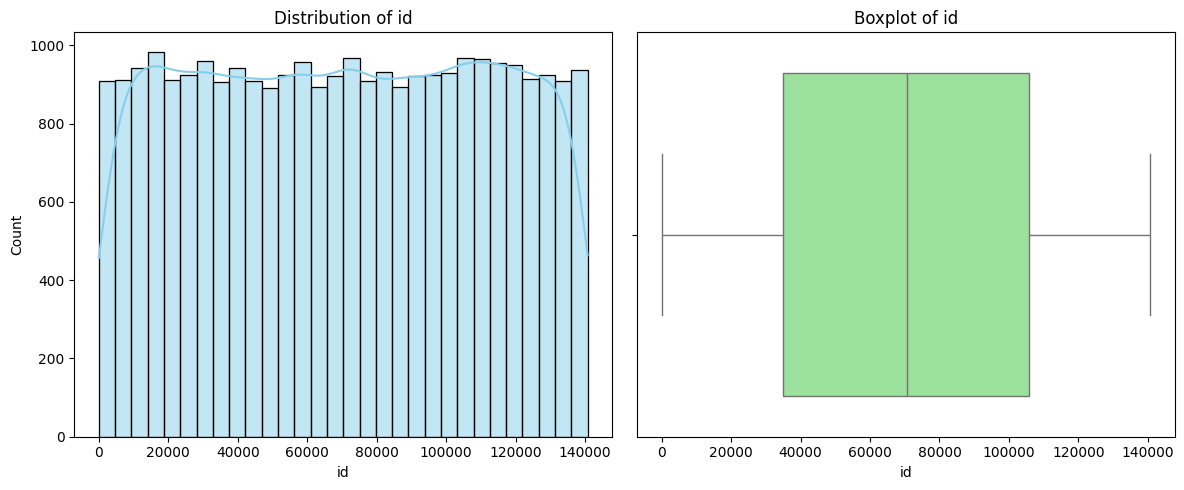

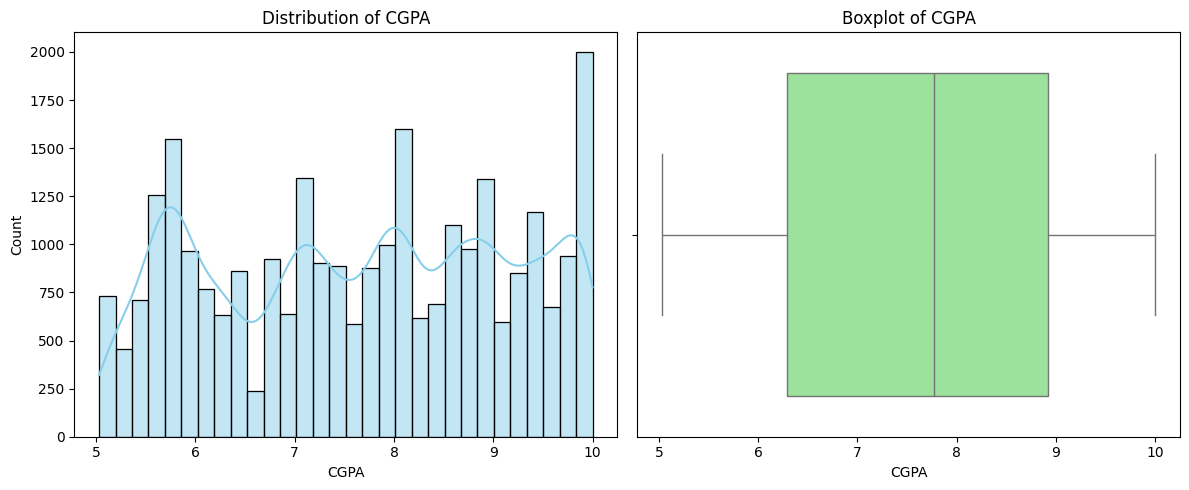

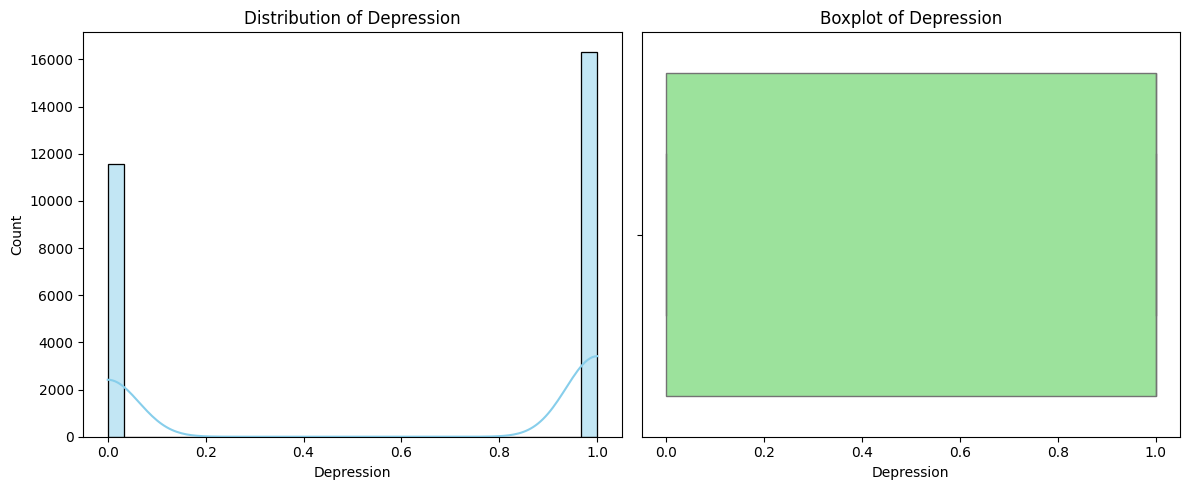

In [32]:
# Select only numerical features
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in num_cols:
    plt.figure(figsize=(12, 5))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sb.histplot(data[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}", fontsize=12)

    # Boxplot
    plt.subplot(1, 2, 2)
    sb.boxplot(x=data[col], color="lightgreen")
    plt.title(f"Boxplot of {col}", fontsize=12)

    plt.tight_layout()
    plt.show()



- The Academic Pressure, Study Satisfaction and Work Hours column has zero values. They will be explored to see if they are missing values or just patterns. Normally a survey like this starts from 1-5



In [33]:
data[data['Academic Pressure'] == 0]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
3501,17549,Female,20,Patna,Student,0,0,5.55,0,0,5-6 hours,Moderate,Class 12,No,0,3,Yes,0
24417,122983,Female,30,Ghaziabad,Student,0,0,5.47,2,0,Less than 5 hours,Unhealthy,B.Com,Yes,5,1,No,0
27178,137013,Male,36,Varanasi,Student,0,0,8.54,3,0,More than 8 hours,Moderate,Class 12,Yes,8,5,Yes,1


In [34]:
data[data['Study Satisfaction']==0]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
3501,17549,Female,20,Patna,Student,0,0,5.55,0,0,5-6 hours,Moderate,Class 12,No,0,3,Yes,0
3655,18344,Male,30,Faridabad,Student,5,0,5.74,0,0,Less than 5 hours,Unhealthy,MCA,Yes,0,3,Yes,1
20283,102714,Female,18,Bhopal,Student,4,0,5.88,0,0,Less than 5 hours,Moderate,Class 12,Yes,5,1,No,1


Both columns has a few rows logged as zero, this shows it is more of a data entry error. The rows will be dropped


In [35]:
# Drop rows where either Study Satisfaction or Academic Pressure is 0
data = data[(data['Study Satisfaction'] != 0) & (data['Academic Pressure'] != 0)]

In [36]:
print(len(data[data['Work/Study Hours'] == 0]))
data[data['Work/Study Hours'] == 0]

1697


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
7,56,Female,30,Chennai,Student,2,0,8.04,4,0,Less than 5 hours,Unhealthy,Class 12,No,0,1,Yes,0
21,162,Male,29,Kolkata,Student,3,0,6.73,3,0,7-8 hours,Moderate,M.Tech,No,0,1,No,0
34,242,Male,21,Surat,Student,1,0,8.04,3,0,More than 8 hours,Healthy,MA,No,0,3,Yes,0
36,255,Female,21,Bhopal,Student,5,0,9.72,2,0,5-6 hours,Moderate,B.Com,Yes,0,4,Yes,1
49,312,Female,19,Rajkot,Student,5,0,6.99,5,0,More than 8 hours,Healthy,Class 12,Yes,0,4,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27759,139910,Female,33,Thane,Student,1,0,8.59,4,0,More than 8 hours,Healthy,LLM,No,0,3,No,0
27808,140160,Female,29,Ludhiana,Student,1,0,7.25,5,0,More than 8 hours,Moderate,LLB,Yes,0,3,No,0
27812,140173,Female,24,Kalyan,Student,4,0,5.87,2,0,5-6 hours,Healthy,M.Com,No,0,4,No,0
27859,140439,Female,31,Vasai-Virar,Student,3,0,5.76,5,0,7-8 hours,Healthy,B.Arch,Yes,0,4,Yes,1


Work/study hours has more than half of it's data logged as 0 which is not a good one. The column will be dropped during prediction

In [37]:
print(len(data[data['Age'] > 35]))

print ('Most of the people that took the survey fall within age range of 18-35')

37
Most of the people that took the survey fall within age range of 18-35


Data Quality Issues

The variables Job Satisfaction, Work Pressure, and Work/Study Hours have most of their values as zero, which is unrealistic. These features will be dropped from further analysis.

In [38]:
data = data.drop(columns=['Job Satisfaction', 'Work Pressure', 'Work/Study Hours'])

C:\Users\USER\AppData\Local\Temp\ipykernel_10272\2661974049.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data, x=col, palette="viridis", ax=axes[i])
C:\Users\USER\AppData\Local\Temp\ipykernel_10272\2661974049.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data, x=col, palette="viridis", ax=axes[i])
C:\Users\USER\AppData\Local\Temp\ipykernel_10272\2661974049.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(data=data, x=col, palette="viridis", ax=axes[i])
C:\Users\USER\AppData\Local\Temp\ipykernel_10272\266197404

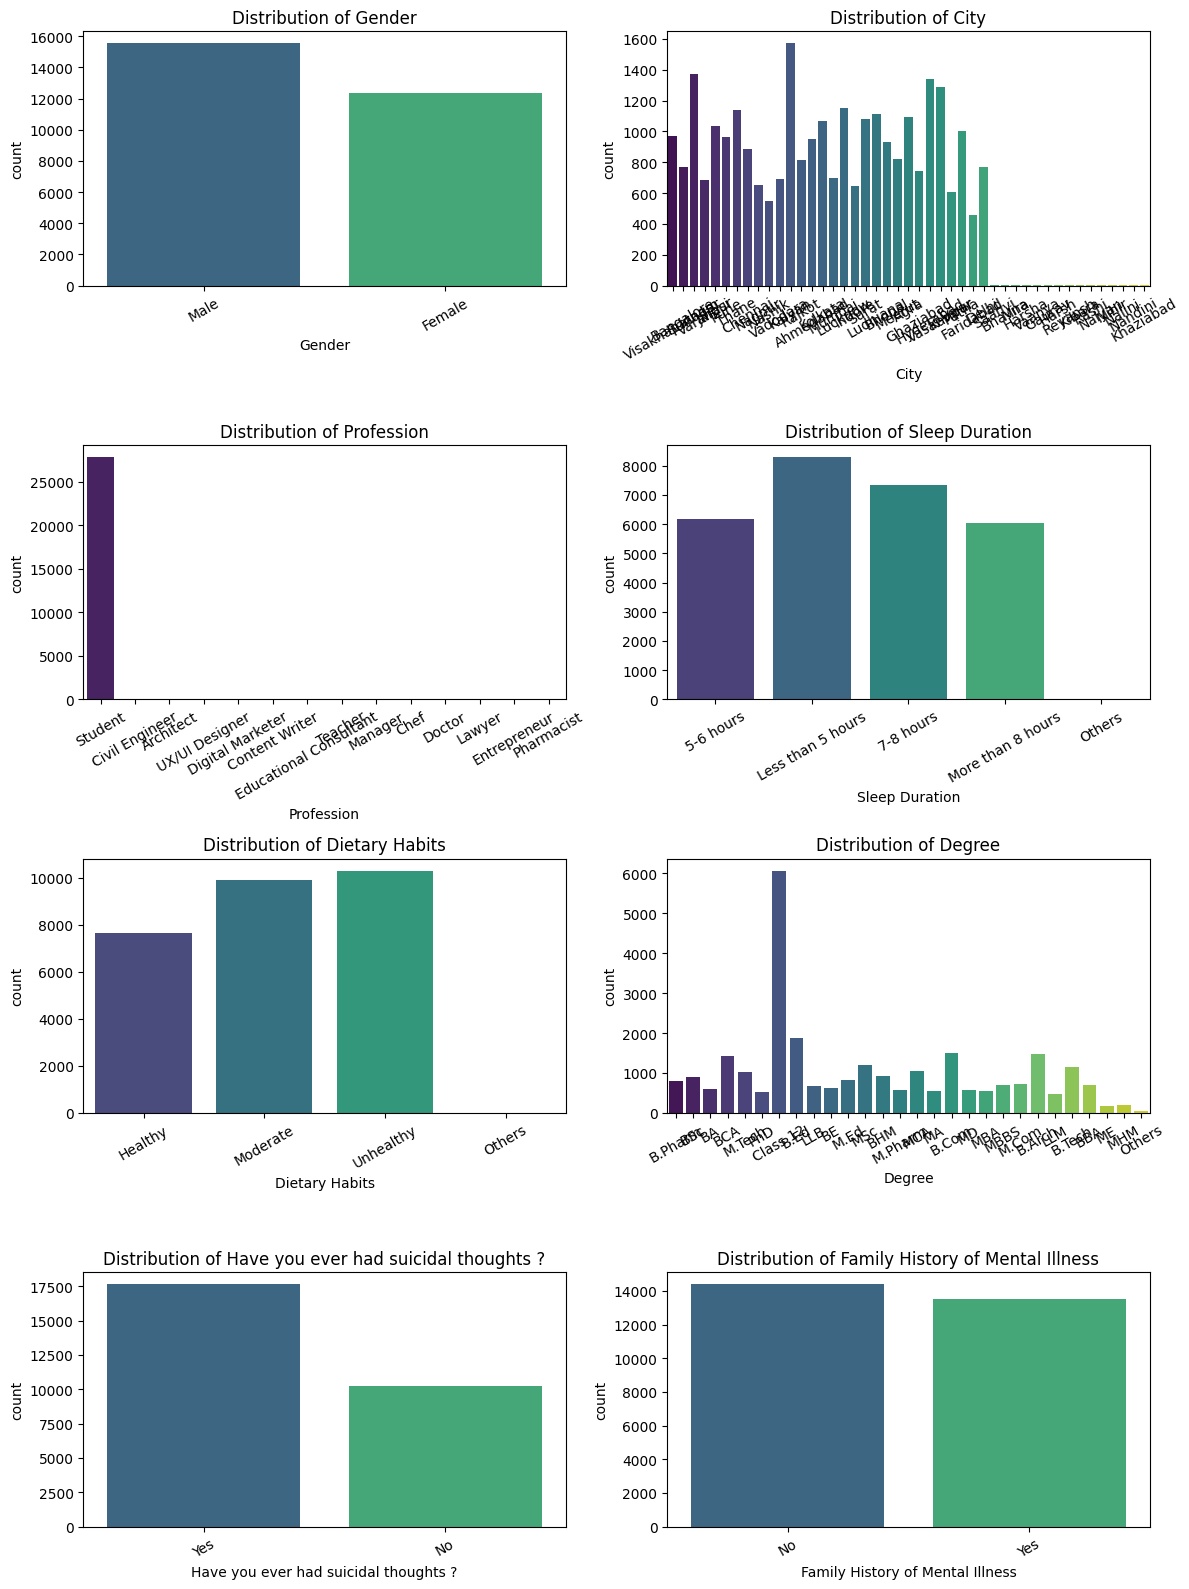

In [39]:
# Select categorical columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Set up grid
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sb.countplot(data=data, x=col, palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=30)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
print(len(data[data['Profession'] != 'Student']))
data[data['Profession'] != 'Student']

31


,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,Depression
113,609,Male,21,Ahmedabad,Civil Engineer,5,7.83,1,5-6 hours,Healthy,MSc,Yes,3,Yes,1
422,2105,Female,31,Vadodara,Architect,5,6.95,3,Less than 5 hours,Moderate,BSc,No,1,Yes,1
1845,9483,Female,32,Kalyan,UX/UI Designer,3,9.60,2,7-8 hours,Moderate,PhD,Yes,3,No,1
2249,11470,Female,28,Ahmedabad,Digital Marketer,5,9.72,3,More than 8 hours,Healthy,MA,Yes,5,Yes,1
2440,12425,Male,25,Kalyan,Content Writer,5,8.50,2,5-6 hours,Moderate,B.Ed,Yes,2,Yes,1
3220,16196,Male,33,Jaipur,Architect,2,7.13,4,More than 8 hours,Moderate,MSc,No,5,Yes,1
3388,16959,Female,24,Mumbai,Architect,3,8.89,5,More than 8 hours,Unhealthy,MSc,Yes,5,Yes,1
3639,18291,Male,32,Agra,Educational Consultant,3,5.74,4,7-8 hours,Healthy,B.Ed,Yes,5,Yes,1
3841,19226,Male,31,Rajkot,Teacher,3,7.48,5,5-6 hours,Unhealthy,MD,Yes,2,Yes,1
5016,25193,Male,24,Kalyan,Teacher,4,9.66,5,7-8 hours,Moderate,BE,Yes,3,No,1


In [41]:
data = data[data['Profession'] == 'Student']

Why dropping other professions makes sense

Data imbalance: Since > 90%+ of records are students, then the model will already be biased toward that group. The few “other professions” will act as noise instead of providing signal.

Prediction focus: Since the aim is student health, including non-students doesn’t add value to prediction. It only risks misleading the model.

Cleaner features: By removing non-students, your dataset becomes more homogeneous, and the model won’t waste capacity on irrelevant categories.

**Demographics**

- Majority fall within the age range 18–35.

- The majority of respondents hold a Class-12 education level.

- Males are more represented compared to females.

**Lifestyle Indicators**

- A larger proportion of respondents sleep less than 5 hours daily.

- Unhealthy dietary habits are more common among participants.

**Mental Health Indicators**

- A significant number of respondents report having suicidal thoughts.

- Fewer respondents reported a family history of mental illness.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27847 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27847 non-null  int64  
 1   Gender                                 27847 non-null  object 
 2   Age                                    27847 non-null  int32  
 3   City                                   27847 non-null  object 
 4   Profession                             27847 non-null  object 
 5   Academic Pressure                      27847 non-null  int32  
 6   CGPA                                   27847 non-null  float64
 7   Study Satisfaction                     27847 non-null  int32  
 8   Sleep Duration                         27847 non-null  object 
 9   Dietary Habits                         27847 non-null  object 
 10  Degree                                 27847 non-null  object 
 11  Have yo

In [43]:
# Create a binary column for suicidal thoughts
data['Suicidal Thoughts'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

In [44]:
# Create a binary column for family history of mental illness
data['Fam_hist_ml'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})


Depression
1    16297
0    11550
Name: count, dtype: int64


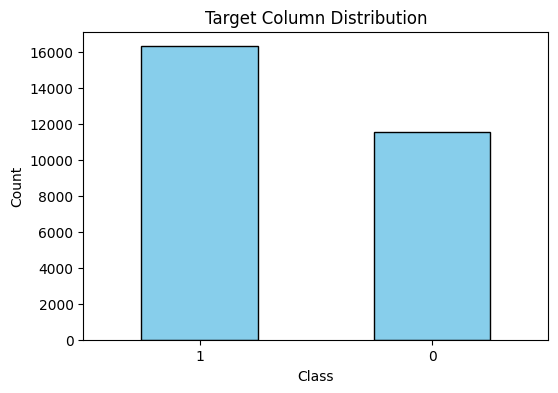

In [45]:
# Count distribution of target column
target_counts = data['Depression'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
target_counts.plot(kind='bar', color='skyblue', edgecolor='black')

print(target_counts)

plt.title("Target Column Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


There are more depressed respondents

### Relationship

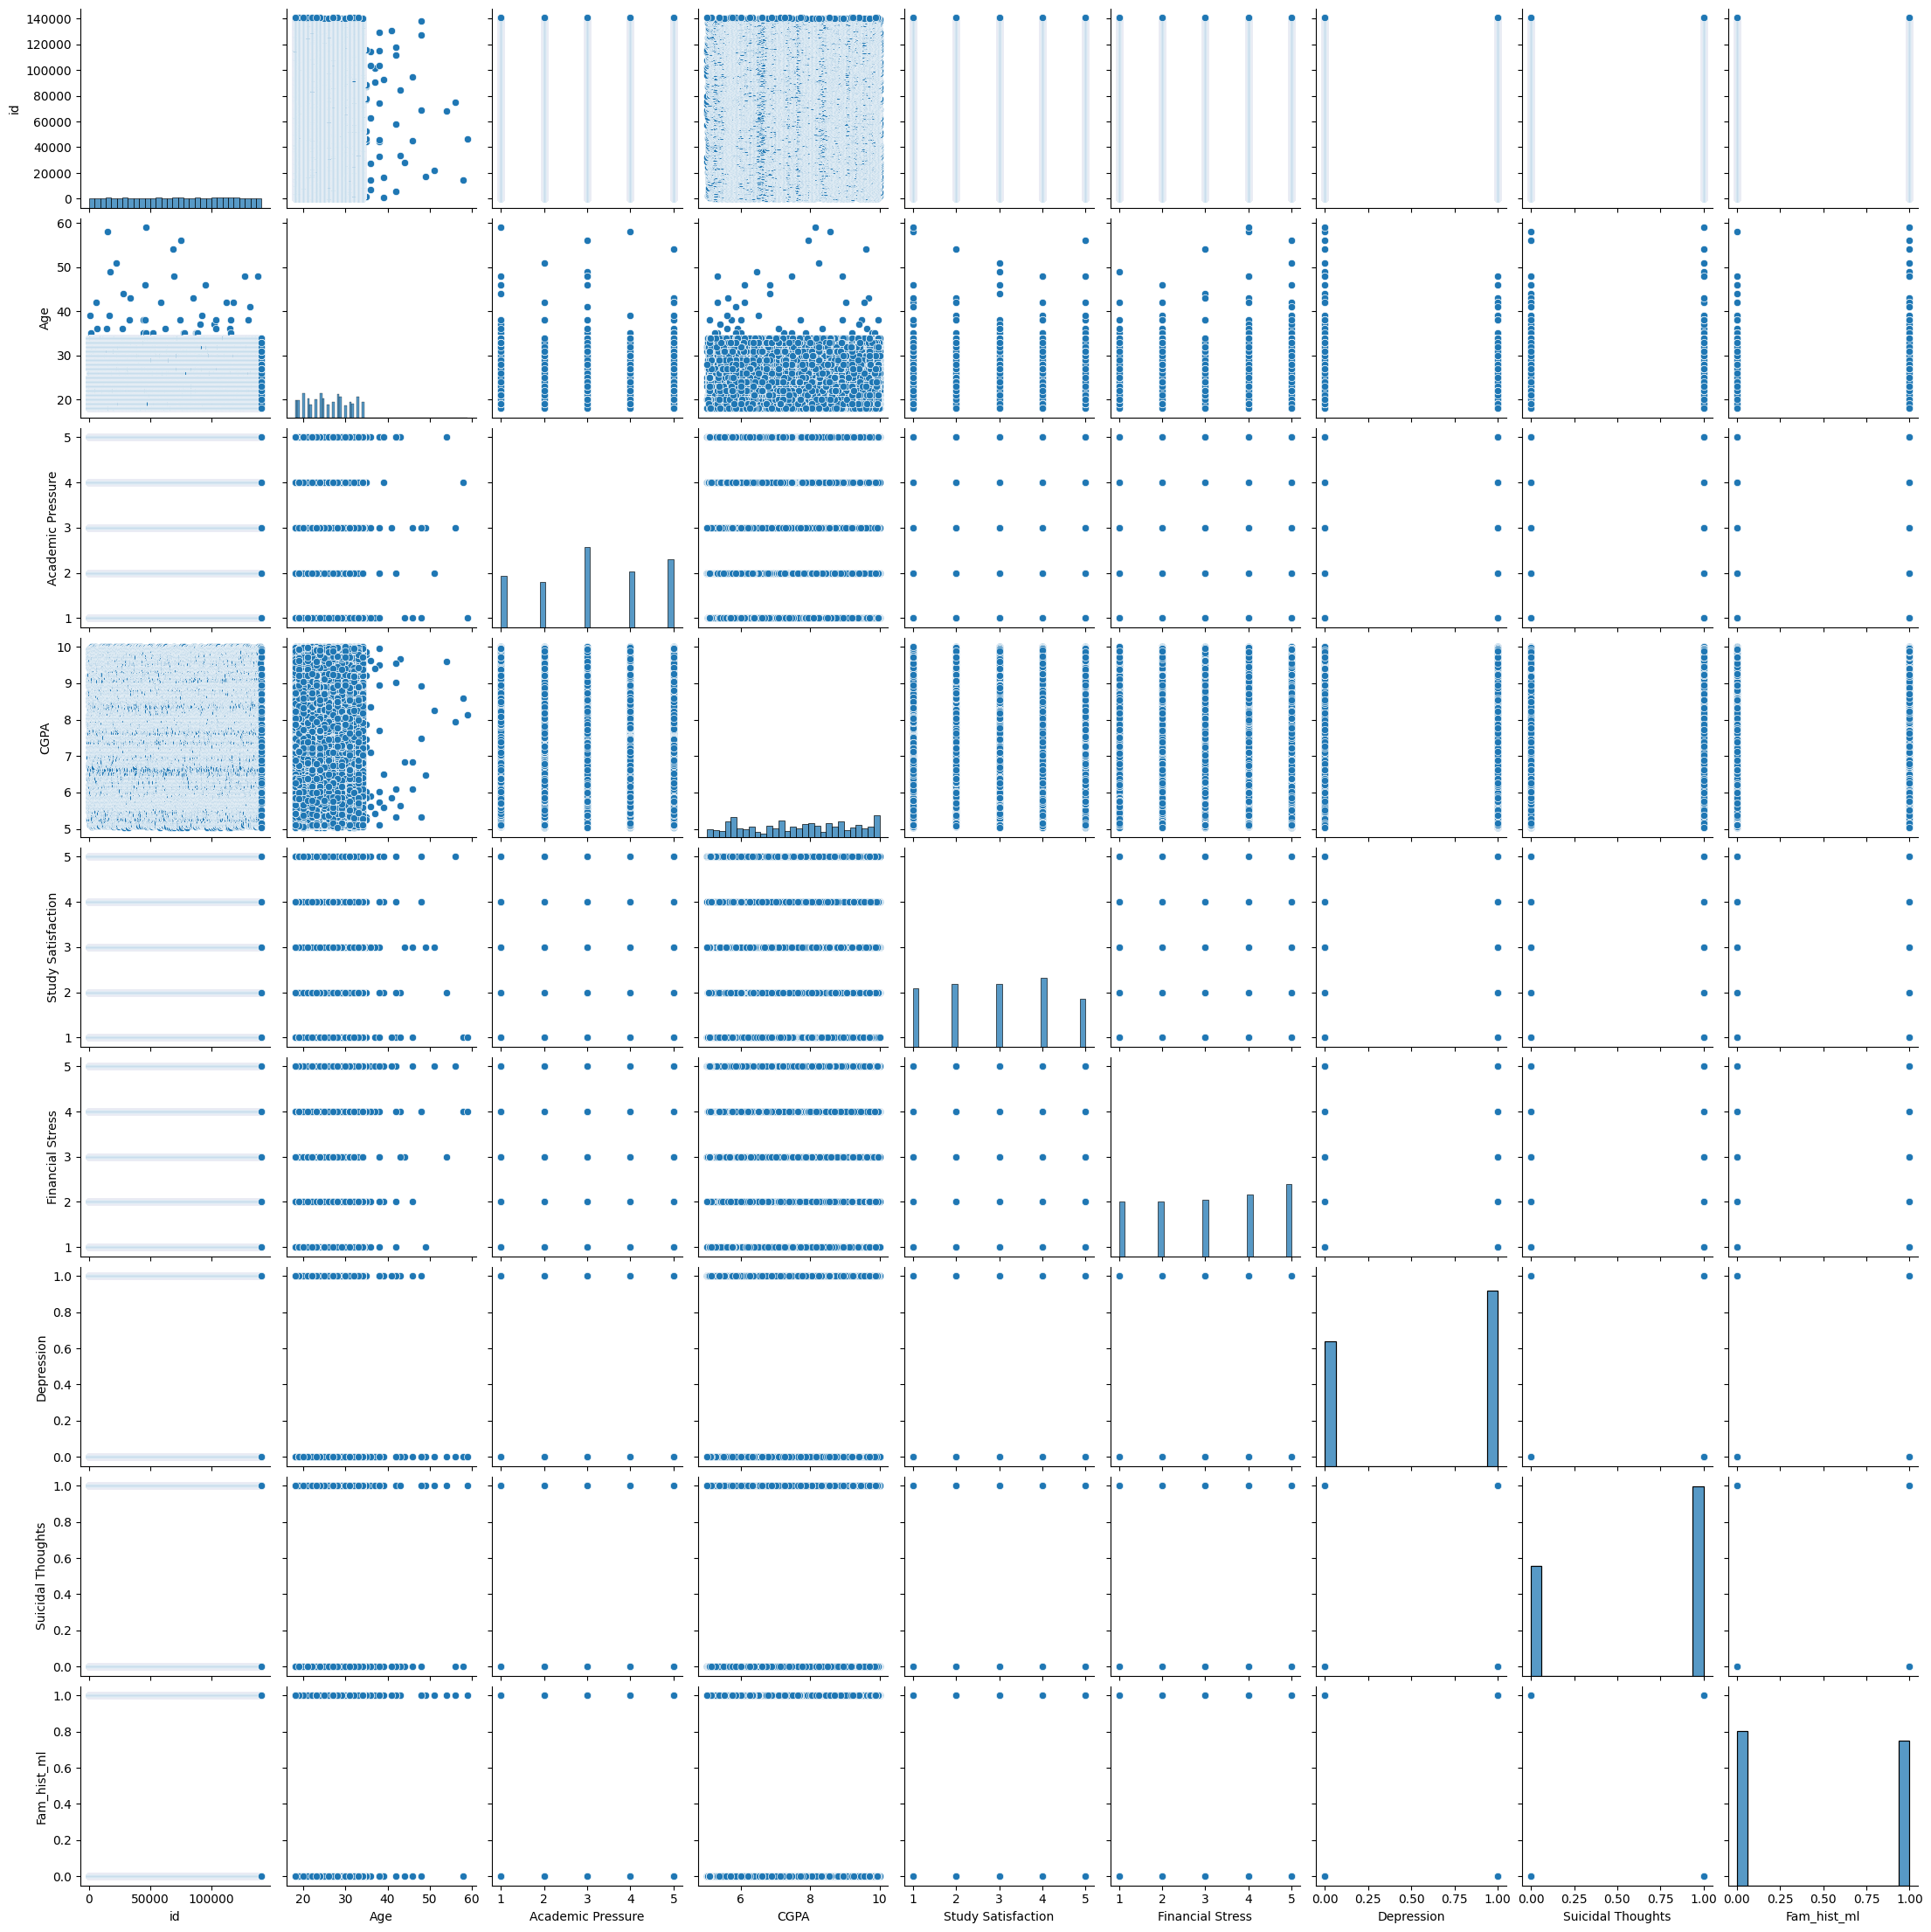

In [46]:
sb.pairplot(data=data)

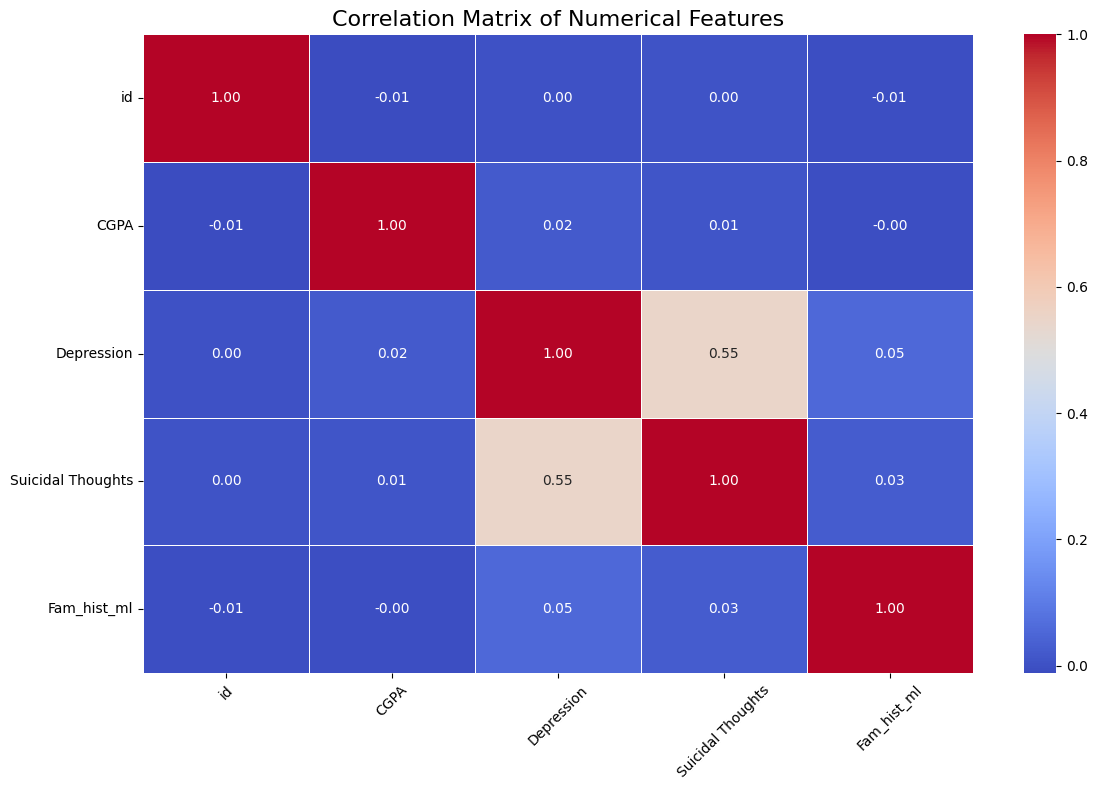

In [47]:
# Select only numerical columns
num_cols = data.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


The pairplot indicates that there are no strong linear relationships between the predictor variables and depression when visualized individually. However, the correlation analysis provides deeper insight: suicidal thoughts show the strongest association with depression (r = 0.55), followed by academic stress (r = 0.47) and financial stress (r = 0.36). This suggests that while depression may not have simple linear dependencies with individual variables, certain psychosocial factors—particularly suicidal ideation and academic pressure—are more influential. These findings highlight the importance of focusing on mental health interventions around academic workload, financial challenges, and early detection of suicidal tendencies among students.

**Note:**
- Age and Depression (-0.23): Younger students tend to report higher depression, while depression slightly decreases with age.

- Study Satisfaction and Depression (-0.17): Students less satisfied with their studies show slightly higher depression, though the effect is weak.

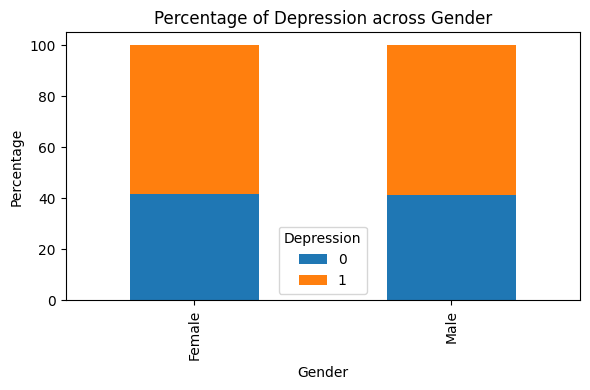

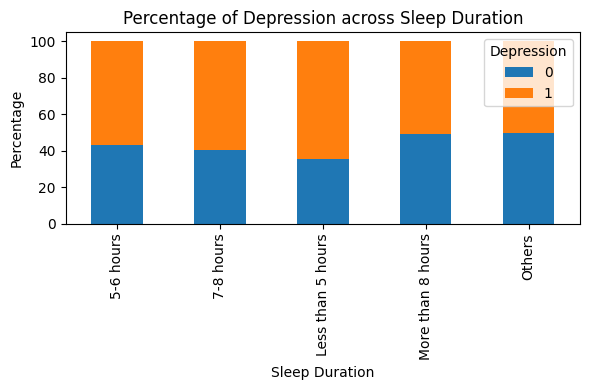

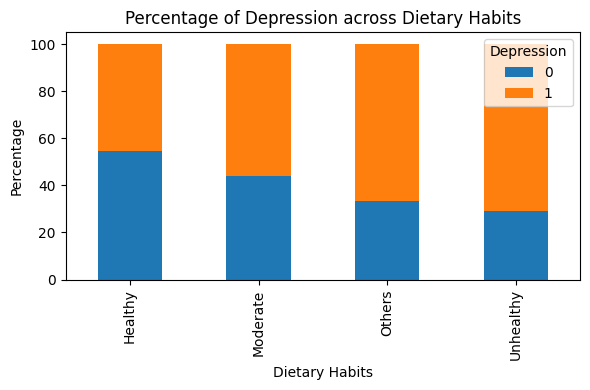

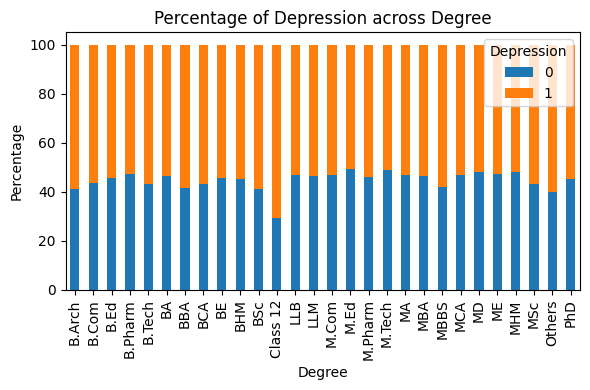

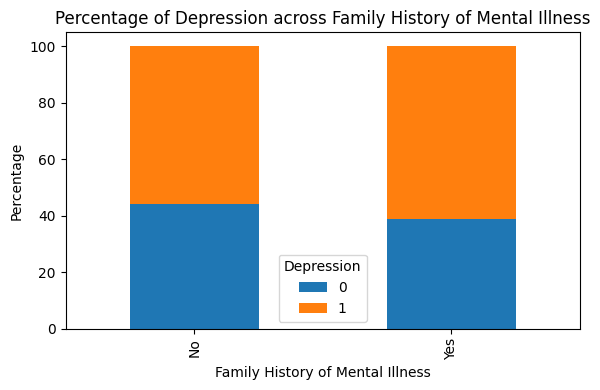

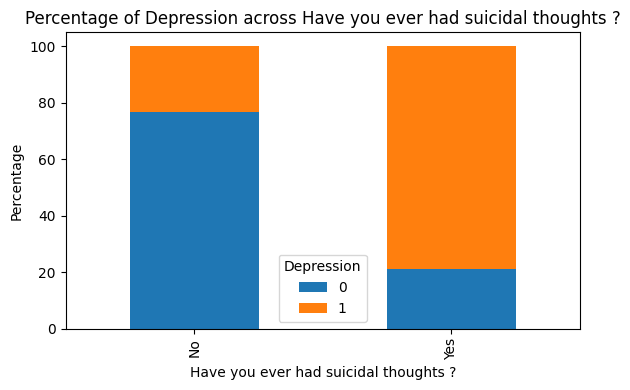

In [48]:
cat_cols = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
target = "Depression"


import pandas as pd

for col in cat_cols:
    cross_tab = pd.crosstab(data[col], data[target], normalize='index') * 100
    cross_tab.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.ylabel("Percentage")
    plt.title(f"Percentage of {target} across {col}")
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()


Conclusion on Categorical Variables and Depression
The analysis of categorical variables reveals the following patterns:

- Depression rates appear evenly distributed across gender.

- Students who sleep fewer than five hours show a higher prevalence of depression.

- Students with unhealthy dietary habits are more likely to experience depression.

- Those in degree class 12 exhibit higher depression rates compared to other classes.

- Individuals with a family history of mental illness are more prone to depression.

- Students reporting suicidal thoughts show a significantly higher association with depression.

### Depression *rate* by region

In [49]:
import plotly.express as px

In [50]:
fig =px.sunburst(data, path=['City', 'Depression', 'Suicidal Thoughts'])
fig.update_layout(
    template='plotly_dark',
    paper_bgcolor='black',
    plot_bgcolor='black'
)
fig.show()

### Feature Selection

In [51]:
new = data.drop(columns = ['id', 'City', 'Profession', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'])

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
ft = new.copy()

In [54]:
for col in ft.columns:
  le = LabelEncoder()
  ft[col] = le.fit_transform(ft[col])
ft.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Financial Stress,Depression,Suicidal Thoughts,Fam_hist_ml
0,1,15,4,265,1,0,0,3,0,1,1,0
1,0,6,1,61,4,0,1,10,1,0,0,1
2,1,13,2,132,4,2,0,5,0,0,0,1
3,0,10,2,33,1,1,1,7,4,1,1,1
4,0,7,3,206,2,0,1,17,0,0,1,0


In [55]:
from sklearn.feature_selection import chi2

In [56]:
A = ft.drop(columns =['Depression'])
b = ft['Depression']

In [57]:
chi_scores = chi2(A,b)

<Axes: >

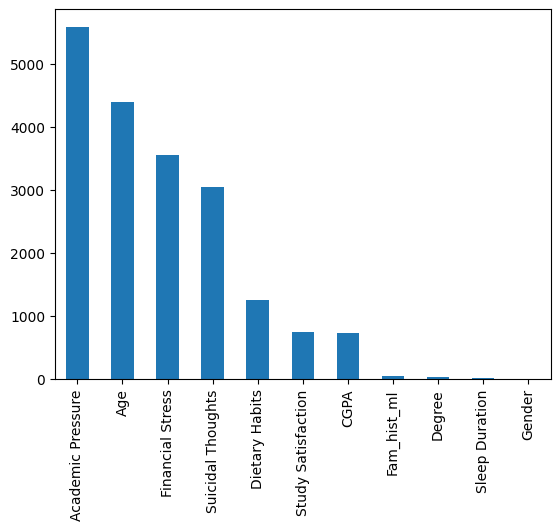

In [58]:
chi_values =  pd.Series(chi_scores[0], index = A.columns)
chi_values.sort_values(ascending = False, inplace=True)
chi_values.plot.bar()

<Axes: >

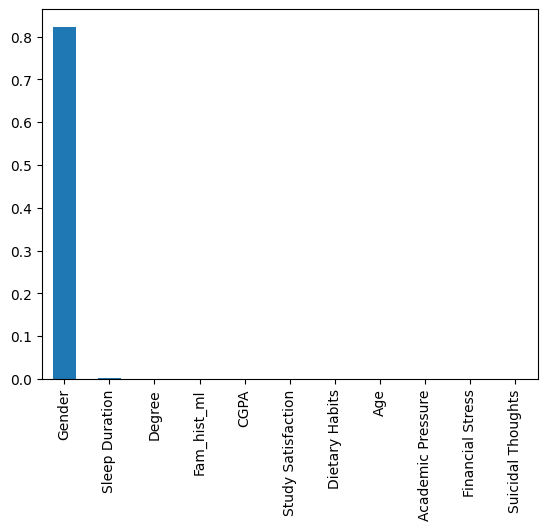

In [59]:
p_values =  pd.Series(chi_scores[1], index = A.columns)
p_values.sort_values(ascending = False, inplace=True)
p_values.plot.bar()

In [60]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
estimator = RandomForestClassifier(random_state=42)

# Pass the instance into RFE
rfe = RFE(estimator=estimator, n_features_to_select=8)

# Fit on your data
rfe.fit(A, b)

,estimator,RandomForestC...ndom_state=42)
,n_features_to_select,8
,step,1
,verbose,0
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [62]:
for i, col in zip(range (A.shape[1]), A.columns):
  print(f'{col} selected = {rfe.support_[i]} ranking = {rfe.ranking_[i]}')

Gender selected = False ranking = 3
Age selected = True ranking = 1
Academic Pressure selected = True ranking = 1
CGPA selected = True ranking = 1
Study Satisfaction selected = True ranking = 1
Sleep Duration selected = True ranking = 1
Dietary Habits selected = False ranking = 2
Degree selected = True ranking = 1
Financial Stress selected = True ranking = 1
Suicidal Thoughts selected = True ranking = 1
Fam_hist_ml selected = False ranking = 4


Both Chi-Square and RFE analyses indicate that most features are highly important for predicting depression, with the exception of Gender. While this feature is not entirely irrelevant, its predictive power appears weaker. To gain deeper insights, models will be tested both with and without them.

### Data Preprocessing

In [63]:
x = new.drop(columns = ['Depression'])
y = new['Depression']

In [64]:
num_cols = x.select_dtypes(include='number').columns
cat_cols = x.select_dtypes(include= ['object', 'category']).columns

In [65]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
#Importing libraries foe encoding and scaling categorical and numerical columns repectively
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [67]:
#create a pipeline for preprocessing
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output= False, handle_unknown ='ignore'))
])

In [68]:
#apply preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

### MODEL TRAINING

In [69]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Dictionary of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#### Without Balancing

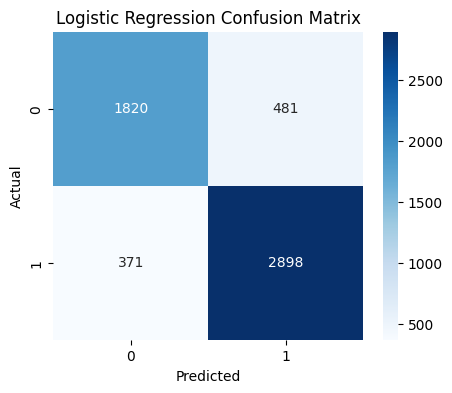


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.86      0.89      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



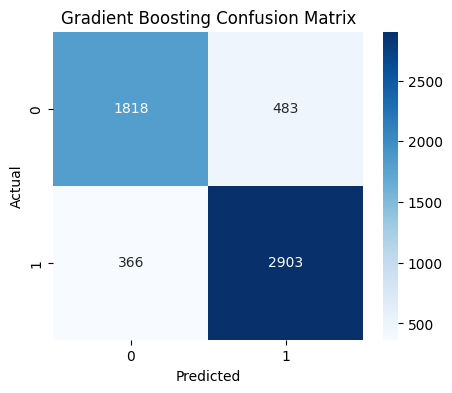


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.86      0.89      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



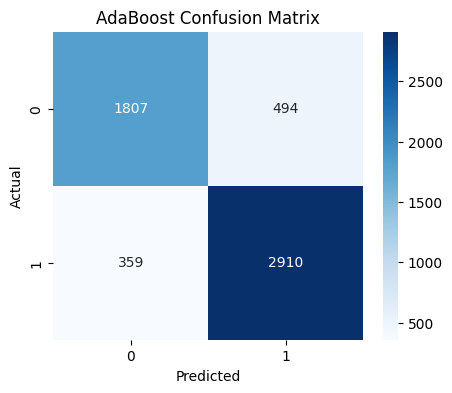


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.85      0.89      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570

[LightGBM] [Info] Number of positive: 13028, number of negative: 9249
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 22277, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584818 -> initscore=0.342585
[LightGBM] [Info] Start training from score 0.342585


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



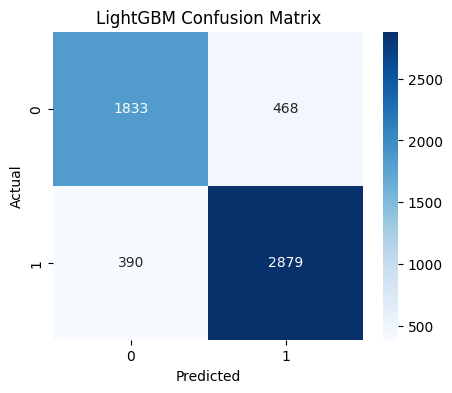


LightGBM Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2301
           1       0.86      0.88      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



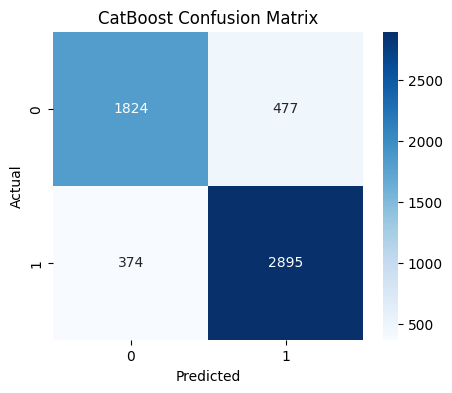


CatBoost Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2301
           1       0.86      0.89      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



In [72]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

results = {}

# loop through models
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # fit model
    pipeline.fit(X_train, y_train)

    # predictions
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # probabilities (for ROC AUC)
    test_proba = pipeline.predict_proba(X_test)[:, 1]

    # metrics
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Recall": recall_score(y_test, test_pred),
        "Precision": precision_score(y_test, test_pred),
        "F1 Score": f1_score(y_test, test_pred),
        "ROC AUC": roc_auc_score(y_test, test_proba),
        "Confusion Matrix": confusion_matrix(y_test, test_pred).tolist()  # stored as list so DataFrame won’t break
    }

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sb.heatmap(results[name]["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, test_pred))

# Convert to DataFrame (without confusion matrix column)
metrics1 = pd.DataFrame(results).T.drop(columns=["Confusion Matrix"])

In [73]:
metrics1

,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score,ROC AUC
Logistic Regression,0.8419,0.847038,0.88651,0.85765,0.871841,0.915836
Gradient Boosting,0.846972,0.847576,0.888039,0.857354,0.872427,0.915286
AdaBoost,0.843381,0.846858,0.89018,0.854877,0.872171,0.915218
LightGBM,0.866589,0.845961,0.880697,0.860173,0.870314,0.912068
CatBoost,0.879831,0.847217,0.885592,0.858541,0.871857,0.913199


#### Balancing with Smote

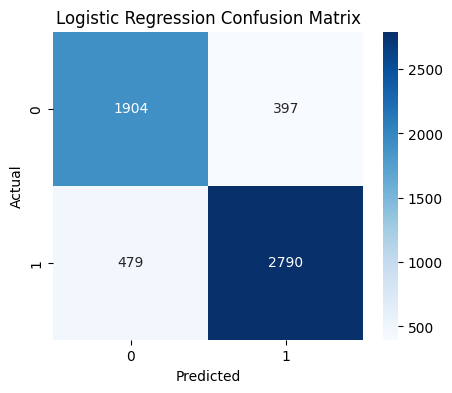


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2301
           1       0.88      0.85      0.86      3269

    accuracy                           0.84      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.84      0.84      0.84      5570



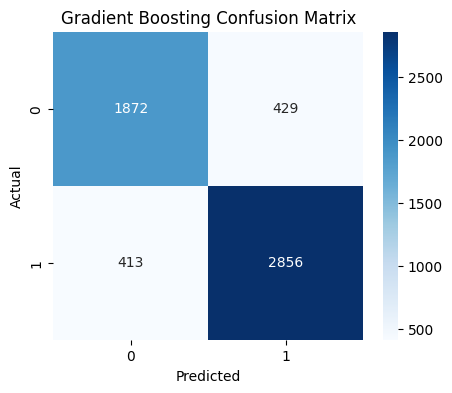


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2301
           1       0.87      0.87      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



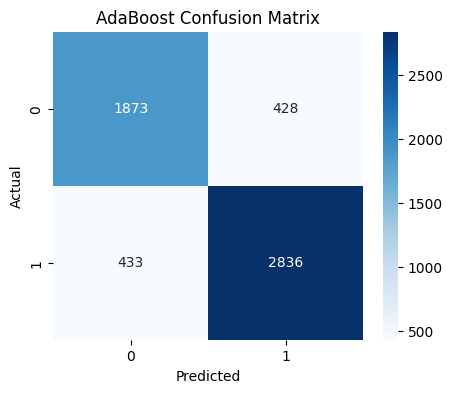


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2301
           1       0.87      0.87      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570

[LightGBM] [Info] Number of positive: 13028, number of negative: 13028
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5264
[LightGBM] [Info] Number of data points in the train set: 26056, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



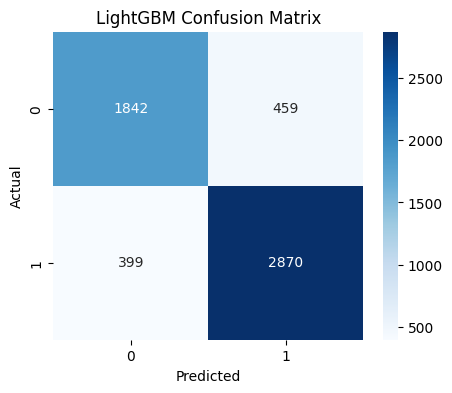


LightGBM Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2301
           1       0.86      0.88      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



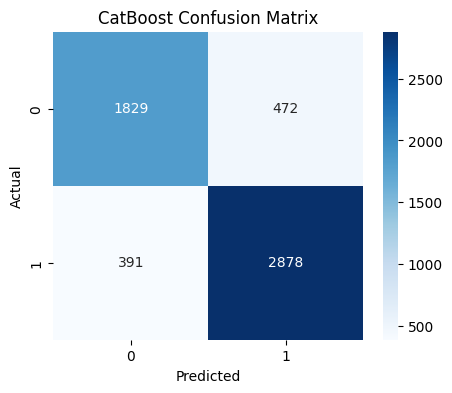


CatBoost Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2301
           1       0.86      0.88      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.84      0.85      0.84      5570



In [74]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

results = {}

# loop through models
for name, model in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # fit model
    pipeline.fit(X_train, y_train)

    # predictions
    train_pred = pipeline.predict(X_train)
    test_pred = pipeline.predict(X_test)

    # probabilities (for ROC AUC)
    test_proba = pipeline.predict_proba(X_test)[:, 1]

    # metrics
    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_pred),
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Recall": recall_score(y_test, test_pred),
        "Precision": precision_score(y_test, test_pred),
        "F1 Score": f1_score(y_test, test_pred),
        "ROC AUC": roc_auc_score(y_test, test_proba),
        "Confusion Matrix": confusion_matrix(y_test, test_pred).tolist()  # stored as list so DataFrame won’t break
    }

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sb.heatmap(results[name]["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, test_pred))

# Convert to DataFrame (without confusion matrix column)
metrics2 = pd.DataFrame(results).T.drop(columns=["Confusion Matrix"])

In [75]:
metrics2

,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score,ROC AUC
Logistic Regression,0.839161,0.842729,0.853472,0.875431,0.864312,0.915893
Gradient Boosting,0.844189,0.848833,0.873662,0.869406,0.871529,0.915091
AdaBoost,0.840957,0.845422,0.867544,0.868873,0.868208,0.916182
LightGBM,0.861427,0.845961,0.877944,0.862121,0.869961,0.912128
CatBoost,0.87844,0.845063,0.880392,0.859104,0.869618,0.912925


#### K-Fold Cross Validation


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      9249
           1       0.87      0.85      0.86     13028

    accuracy                           0.84     22277
   macro avg       0.83      0.84      0.83     22277
weighted avg       0.84      0.84      0.84     22277



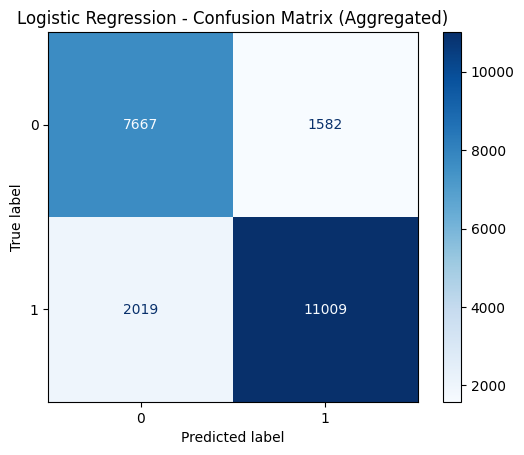


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      9249
           1       0.86      0.87      0.86     13028

    accuracy                           0.84     22277
   macro avg       0.84      0.84      0.84     22277
weighted avg       0.84      0.84      0.84     22277



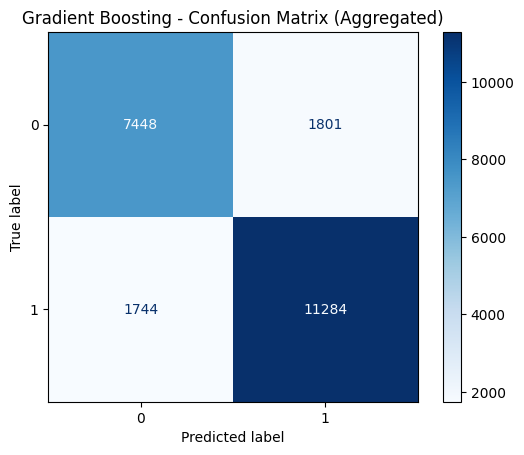


AdaBoost Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      9249
           1       0.87      0.86      0.86     13028

    accuracy                           0.84     22277
   macro avg       0.84      0.84      0.84     22277
weighted avg       0.84      0.84      0.84     22277



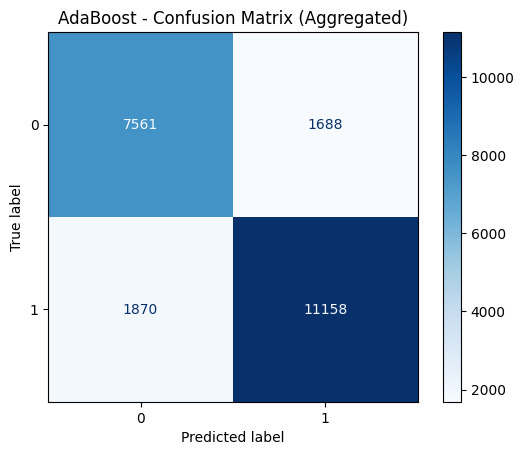

[LightGBM] [Info] Number of positive: 10422, number of negative: 10422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3788
[LightGBM] [Info] Number of data points in the train set: 20844, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[LightGBM] [Info] Number of positive: 10422, number of negative: 10422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3935
[LightGBM] [Info] Number of data points in the train set: 20844, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[LightGBM] [Info] Number of positive: 10422, number of negative: 10422
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4270
[LightGBM] [Info] Number of data points in the train set: 20844, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[LightGBM] [Info] Number of positive: 10423, number of negative: 10423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3634
[LightGBM] [Info] Number of data points in the train set: 20846, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[LightGBM] [Info] Number of positive: 10423, number of negative: 10423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3765
[LightGBM] [Info] Number of data points in the train set: 20846, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names




LightGBM Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      9249
           1       0.86      0.87      0.86     13028

    accuracy                           0.84     22277
   macro avg       0.84      0.83      0.83     22277
weighted avg       0.84      0.84      0.84     22277



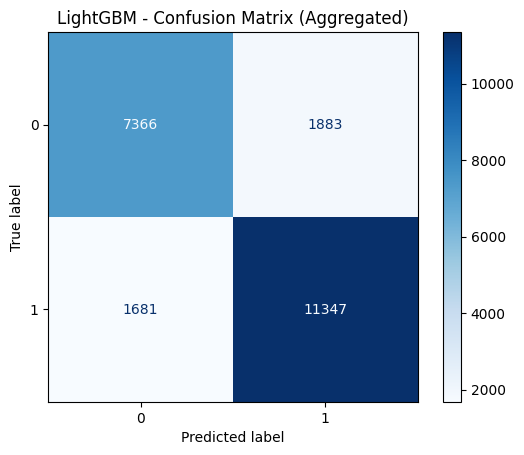


CatBoost Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      9249
           1       0.86      0.87      0.86     13028

    accuracy                           0.84     22277
   macro avg       0.84      0.83      0.83     22277
weighted avg       0.84      0.84      0.84     22277



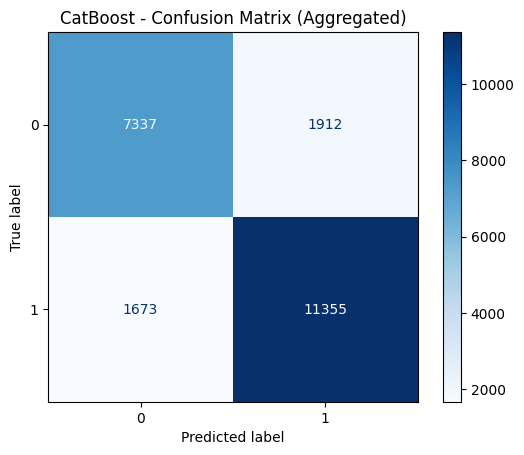

In [76]:
from sklearn.model_selection import StratifiedKFold

results = {}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    fold_metrics = {
        "Train Accuracy": [],
        "Test Accuracy": [],
        "Recall": [],
        "Precision": [],
        "F1 Score": [],
        "ROC AUC": []
    }

    # Store aggregate predictions for classification report
    all_y_true, all_y_pred = [], []

    # Loop through folds
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('model', model)
        ])

        pipeline.fit(X_tr, y_tr)
        y_train_pred = pipeline.predict(X_tr)
        y_val_pred = pipeline.predict(X_val)
        y_val_proba = pipeline.predict_proba(X_val)[:, 1] if hasattr(pipeline, "predict_proba") else None

        # Store metrics per fold
        fold_metrics["Train Accuracy"].append(accuracy_score(y_tr, y_train_pred))
        fold_metrics["Test Accuracy"].append(accuracy_score(y_val, y_val_pred))
        fold_metrics["Recall"].append(recall_score(y_val, y_val_pred))
        fold_metrics["Precision"].append(precision_score(y_val, y_val_pred))
        fold_metrics["F1 Score"].append(f1_score(y_val, y_val_pred))
        if y_val_proba is not None:
            fold_metrics["ROC AUC"].append(roc_auc_score(y_val, y_val_proba))

        # Collect predictions for classification report
        all_y_true.extend(y_val)
        all_y_pred.extend(y_val_pred)

    # Average metrics across folds
    results[name] = {metric: np.mean(values) for metric, values in fold_metrics.items()}

    # Classification report (aggregate across all folds)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(all_y_true, all_y_pred))

    #Confusion matrix (aggregate)
    cm = confusion_matrix(all_y_true, all_y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"{name} - Confusion Matrix (Aggregated)")
    plt.show()

# Convert to DataFrame (metrics summary)
metrics3 = pd.DataFrame(results).T

In [77]:
metrics3

,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score,ROC AUC
Logistic Regression,0.839038,0.838353,0.845026,0.874345,0.859434,0.915703
Gradient Boosting,0.846456,0.840867,0.866134,0.862381,0.864243,0.916168
AdaBoost,0.841451,0.840283,0.856463,0.868594,0.862476,0.916251
LightGBM,0.867038,0.840014,0.870970,0.857681,0.864265,0.913960
CatBoost,0.882468,0.839072,0.871584,0.855900,0.863662,0.913979


- Model performance improved significantly after applying class balancing.

- Gradient Boosting demonstrated the best trade-off in detecting both depressed and non-depressed cases, which was consistent with the cross-validation results.

- The next step is to fine-tune the Gradient Boosting model to further optimize its predictive power.

## Hperpatameter Tuning

from sklearn.model_selection import GridSearchCV, StratifiedKFold

from scipy.stats import randint, uniform


Define pipeline

gb_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),

    ('smote', SMOTE(random_state=42)),

    ('model', GradientBoostingClassifier(random_state=42))
])

Define parameter grid for Gradient Boosting

param_dist = {
    "n_estimators": randint(50, 200),        # smaller trees

    "max_depth": randint(2, 5),             # shallow trees

    "learning_rate": uniform(0.01, 0.2),    # lower LR range

    "subsample": uniform(0.7, 0.3),         # 0.7 – 1.0

    "min_samples_split": randint(2, 20),

    "min_samples_leaf": randint(1, 10)
}

Grid Search

grid_search = GridSearchCV(

    estimator=gb_pipeline,

    param_grid=param_grid,

    scoring='f1',

    cv=3,

    n_jobs=-1,

    verbose=2
)

**Fit grid search**

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

print("Best CV Score:", grid_search.best_score_)

**Evaluate on test set**

best_model = grid_search.best_estimator_

test_pred = best_model.predict(X_test)

test_proba = best_model.predict_proba(X_test)[:, 1]

print("Test F1:", f1_score(y_test, test_pred))

print("Test ROC AUC:", roc_auc_score(y_test, test_proba))


**Result:**

learning_rate = 0.1,

max_depth = 3,

min_samples_split = 2,

n_estimators = 200,

subsample = 1.0

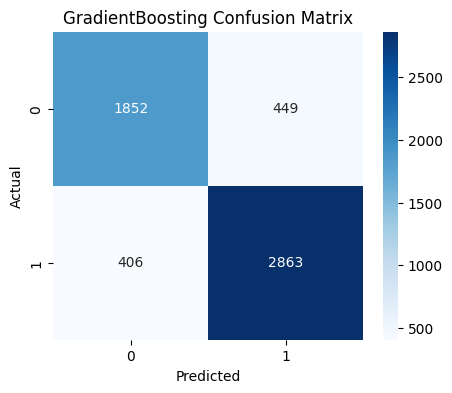


GradientBoosting Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2301
           1       0.86      0.88      0.87      3269

    accuracy                           0.85      5570
   macro avg       0.84      0.84      0.84      5570
weighted avg       0.85      0.85      0.85      5570



In [78]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# model
model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    max_depth = 3
)

# pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# fit
pipeline.fit(X_train, y_train)

# predictions
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)
test_proba = pipeline.predict_proba(X_test)[:, 1]

# results dict
name = "GradientBoosting"
results = {}
results[name] = {
    "Train Accuracy": accuracy_score(y_train, train_pred),
    "Test Accuracy": accuracy_score(y_test, test_pred),
    "Recall": recall_score(y_test, test_pred),
    "Precision": precision_score(y_test, test_pred),
    "F1 Score": f1_score(y_test, test_pred),
    "ROC AUC": roc_auc_score(y_test, test_proba),
    "Confusion Matrix": confusion_matrix(y_test, test_pred).tolist()
}

# plot
plt.figure(figsize=(5,4))
sb.heatmap(results[name]["Confusion Matrix"], annot=True, fmt='d', cmap='Blues')
plt.title(f'{name} Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# report
print(f"\n{name} Classification Report:\n")
print(classification_report(y_test, test_pred))

# dataframe
metricsGrad = pd.DataFrame(results).T.drop(columns=["Confusion Matrix"])


In [79]:
metricsGrad

,Train Accuracy,Test Accuracy,Recall,Precision,F1 Score,ROC AUC
GradientBoosting,0.848678,0.846499,0.875803,0.864432,0.870081,0.915048


In [80]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import pandas as pd
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# model
model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# run cross-validation
cv_results = cross_validate(
    pipeline,
    X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# convert results to DataFrame
metricsGradCV = pd.DataFrame(cv_results)
metrics_summary = metricsGradCV.mean().to_frame("Mean").T

print("Cross-validation results (per fold):")
print(metricsGradCV)

print("\nAverage performance across folds:")
print(metrics_summary)


Cross-validation results (per fold):
    fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
0  29.606525    0.187515       0.845601        0.850345     0.875288   
1  29.865651    0.195838       0.846050        0.849054     0.877206   
2  29.929250    0.161044       0.828058        0.853103     0.859555   
3  30.177657    0.172645       0.846914        0.850353     0.876008   
4  29.842587    0.194829       0.839731        0.851588     0.862956   

   train_recall  test_precision  train_precision   test_f1  train_f1  \
0      0.876511        0.862708         0.868759  0.868952  0.872618   
1      0.877663        0.861991         0.866029  0.869532  0.871807   
2      0.880157        0.848485         0.870138  0.853984  0.875119   
3      0.877195        0.864067         0.868281  0.869996  0.872715   
4      0.879497        0.862956         0.868416  0.862956  0.873922   

   test_roc_auc  train_roc_auc  
0      0.920095       0.924485  
1      0.919323       0.924503 

Hyperparameter tuning improved the model’s performance by 1%

### Feature Importance

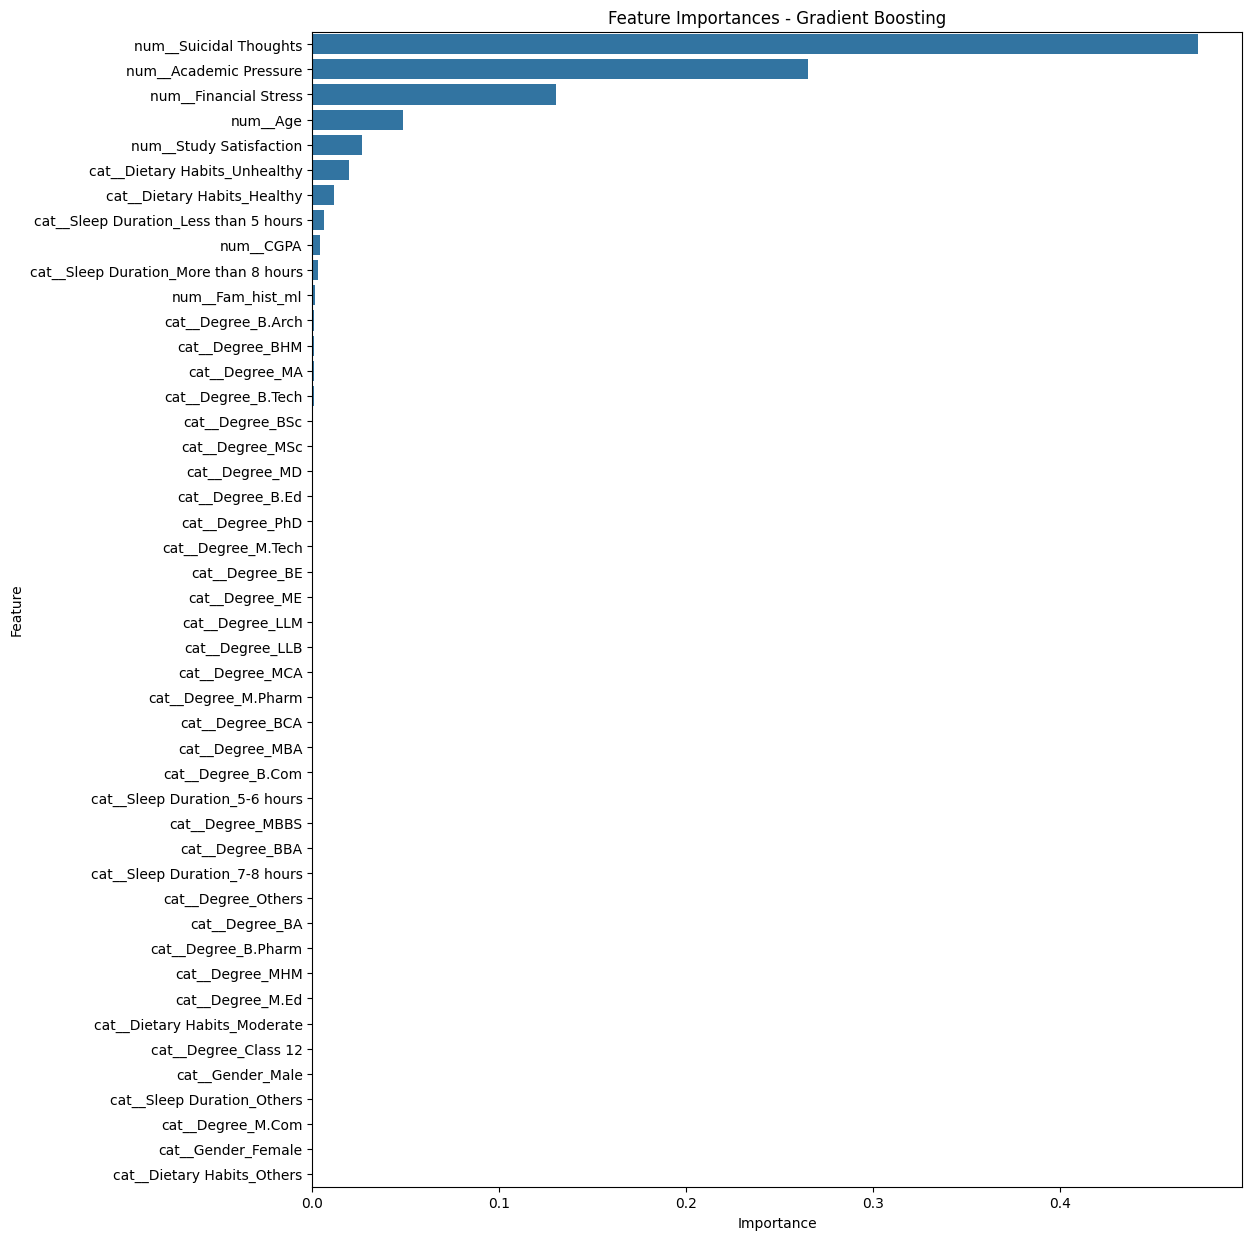

In [81]:
# ensure the pipeline is fitted
pipeline.fit(X_train, y_train)

# now extract fitted model
fitted_model = pipeline.named_steps['model']

# get feature names from preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# feature importances
importances = fitted_model.feature_importances_

# put into DataFrame
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# plot
plt.figure(figsize=(12,15))
sb.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importances - Gradient Boosting")
plt.show()


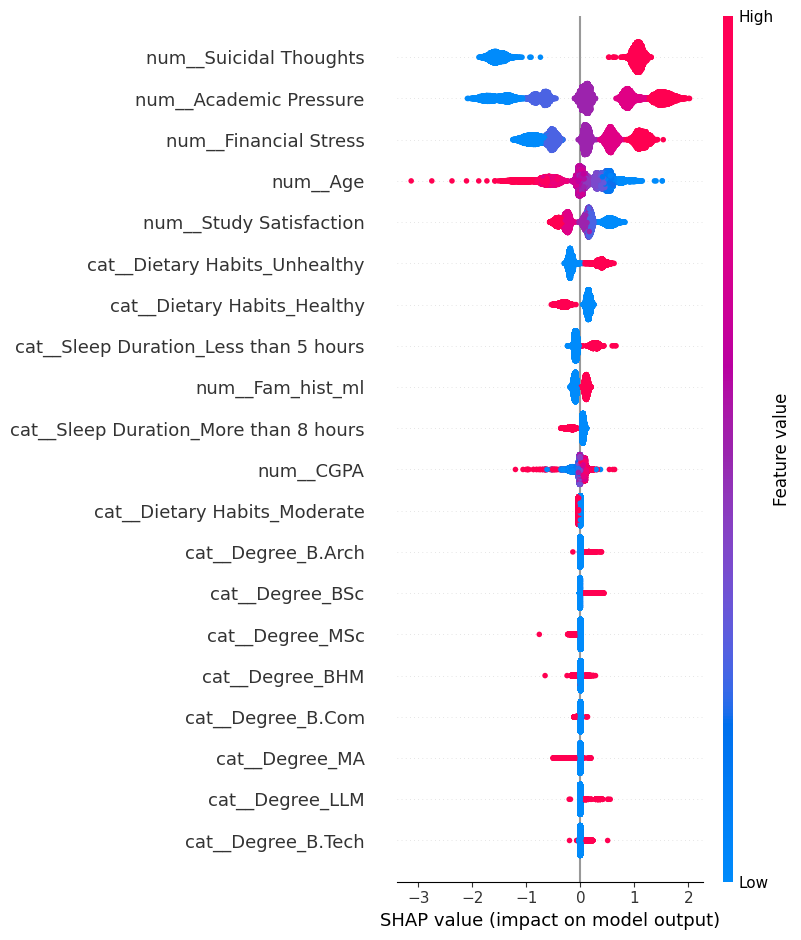

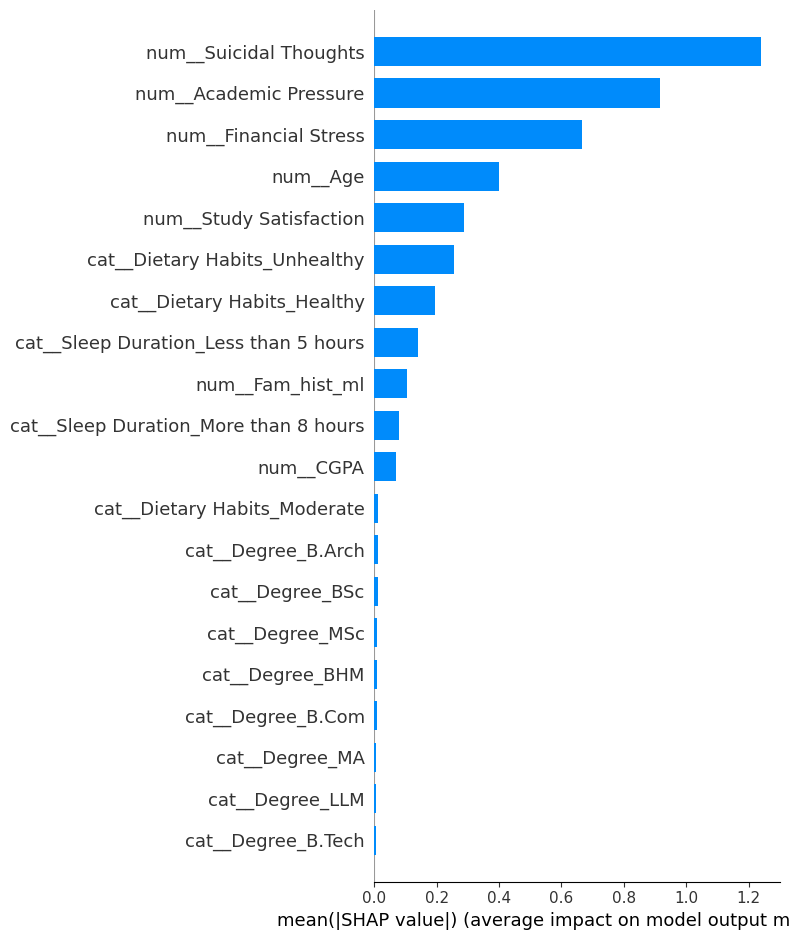

In [82]:
import shap

# make sure pipeline is fitted
pipeline.fit(X_train, y_train)

# get transformed training data
X_train_transformed = pipeline.named_steps['preprocessor'].transform(X_train)

# get the fitted GradientBoosting model from the pipeline
fitted_model = pipeline.named_steps['model']

# SHAP explainer
explainer = shap.TreeExplainer(fitted_model)
shap_values = explainer.shap_values(X_train_transformed)

# feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# summary plot (global importance)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)

# bar plot (average importance)
shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names, plot_type="bar")


### Saving Pipeline

In [83]:
Gradmodel = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=200,
    subsample=1.0,
    random_state=42
))
])


In [84]:
Gradmodel.fit(x,y)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
#save model
import joblib
joblib.dump(Gradmodel, 'Depression_predictor.pkl')

['Depression_predictor.pkl']

In [87]:
new.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
       'Depression', 'Suicidal Thoughts', 'Fam_hist_ml'],
      dtype='object')

In [88]:
new['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [89]:
import pandas as pd
import sklearn
import joblib

print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("joblib:", joblib.__version__)


pandas: 2.2.2
scikit-learn: 1.7.1
joblib: 1.5.1
